# Capítulo 6 - Objetos de alinhamento de sequência múltipla

Nesse capítulo falaremos sobre Alinhamentos de Sequências Múltiplas, o que significa uma coleção de sequências múltiplas que foram alinhadas juntas (normalmente com a inserção de caracteres de gap e adição de lacunas à esquerda ou à direita) de modo que todas as strings de sequência possua o mesmo tamanho. Esse alinhamento pode ser considerado uma matriz de letras, onde cada linha pertence a um objeto **SeqRecord**.

Vamos aprender a usar o objeto **MultipleSeqAlignment** que contém este tipo de dado e o módulo `Bio.AlignIO` para leitura e escrita dos vários tipos de formato de arquivo (o `Bio.AlignIO` segue o mesmo design do `Bio.SeqIO`). Observe que tanto o `Bio.SeqIO` como o `Bio.AlignIO` podem ler e escrever arquivos de alinhamento de sequências. A escolha apropriada dependerá do que você quer fazer com os dados.

A parte final deste capítulo é sobre como usar a linha de comando para os alinhamentos de sequências múltiplas com as ferramentas ClustalW e MUSCLE.

## 6.1 Análise ou leitura de alinhamentos de sequência

Assim como o `Bio.SeqIO`, o `Bio.AlignIO` possui duas funções de análise, a **read** e **parse** que funcionam da mesma maneira que o módulo do capítulo anterior (https://github.com/GTL98/biopython_br/tree/main/Cap%205%20-%20Sequ%C3%AAncias%20Input_Output).

Usando o `Bio.AlignIO.parse()` será retornado um iterador com objetos **MultipleSeqAlignment**. Iteradores são normalmente usados em loops. Alguns exemplos onde você terá diferentes alinhamentos múltiplos incluem reamostragem de alinhamentos vindo de arquivos PHYLIP da ferramenta seeqboot, ou múltiplos alinhamentos de pares de arquivos EMBOSS das ferramentas water ou  needle, ou ferramentas FASTA de Bill Pearson.

Entretanto, em diversas situações você trabalhará com arquivos que contêm somente um alinhamento. Nesses casos, você deverá usar a função **read** para retornar somente um objetos **MultipleSeqAlignment**.

Ambas as funções (**read** e **parse**) necessitam de dois argumentos mandatórios:

- O primeiro argumento é o *identificador* do arquivo que deverá ser lido, geralmente um arquivo já aberto ou o próprio nome do arquivo e;

- O segundo argumento é uma string em minúsculo com o formato de arquivo. Como em `Bio.SeqIO`, não devemos adivinhar o formato de arquivo; veja https://biopython.org/wiki/AlignIO para saber quais são os formatos de arquivos suportados.

Há também um terceiro argumento chamado de **seq_count** que será visto na **Seção 6.1.3** quando formos lidar com formatos de arquivos ambíguos que contém mais de um ainhamento. Fora essa situação, ele é um argumento opcional.

### 6.1.1 Alinhamentos simples

Como exemplo, considere a anotação a seguir de alinhamento de proteína em arquivos PFAM ou Stockholm. Para baixar o arquivo, entre no site https://pfam.xfam.org/ e pesquise o número de idetificação (PF05356), depois de aberta a página com as características vá na aba *Alignments*. Na tabela *Format an alignment*, selecione *Stockholm* no campo *Format*; no campo *Gaps* selecione a opção *Gaps as "-" (dashes)* e deixe marcado a opção *Download*. Com tudo isso pronto, clique no botão *Generate*. Com o arquivo já no diretório de onde será rodado o código, troque a extensão **.txt** para **.sth**.

Para os exemplos que faremos aqui usaremos o arquivo usado no livro original do Biopython, mas o caminho mostrado acima serve para baixar qualquer sequência que você queira:

In [1]:
from Bio import AlignIO
alinhamento = AlignIO.read('PF05371_seed.sth', 'stockholm')
print(alinhamento)

Alignment with 7 rows and 52 columns
AEPNAATNYATEAMDSLKTQAIDLISQTWPVVTTVVVAGLVIRL...SKA COATB_BPIKE/30-81
AEPNAATNYATEAMDSLKTQAIDLISQTWPVVTTVVVAGLVIKL...SRA Q9T0Q8_BPIKE/1-52
DGTSTATSYATEAMNSLKTQATDLIDQTWPVVTSVAVAGLAIRL...SKA COATB_BPI22/32-83
AEGDDP---AKAAFNSLQASATEYIGYAWAMVVVIVGATIGIKL...SKA COATB_BPM13/24-72
AEGDDP---AKAAFDSLQASATEYIGYAWAMVVVIVGATIGIKL...SKA COATB_BPZJ2/1-49
AEGDDP---AKAAFDSLQASATEYIGYAWAMVVVIVGATIGIKL...SKA Q9T0Q9_BPFD/1-49
FAADDATSQAKAAFDSLTAQATEMSGYAWALVVLVVGATVGIKL...SRA COATB_BPIF1/22-73


Você notará que na saída acima as sequências estão um pouco truncadas. Para deixar mais bonito, podemos escrever o nosso próprio código para formatar isso como quisermos, iterando sobre as linhas do arquivo como objetos **SeqRecord**:

In [2]:
from Bio import AlignIO
alinhamento = AlignIO.read('PF05371_seed.sth', 'stockholm')
print(f'Tamanho do alinhamento: {alinhamento.get_alignment_length()}')

Tamanho do alinhamento: 52


In [3]:
for registro in alinhamento:
    print(f'{registro.seq} - {registro.id}')

AEPNAATNYATEAMDSLKTQAIDLISQTWPVVTTVVVAGLVIRLFKKFSSKA - COATB_BPIKE/30-81
AEPNAATNYATEAMDSLKTQAIDLISQTWPVVTTVVVAGLVIKLFKKFVSRA - Q9T0Q8_BPIKE/1-52
DGTSTATSYATEAMNSLKTQATDLIDQTWPVVTSVAVAGLAIRLFKKFSSKA - COATB_BPI22/32-83
AEGDDP---AKAAFNSLQASATEYIGYAWAMVVVIVGATIGIKLFKKFTSKA - COATB_BPM13/24-72
AEGDDP---AKAAFDSLQASATEYIGYAWAMVVVIVGATIGIKLFKKFASKA - COATB_BPZJ2/1-49
AEGDDP---AKAAFDSLQASATEYIGYAWAMVVVIVGATIGIKLFKKFTSKA - Q9T0Q9_BPFD/1-49
FAADDATSQAKAAFDSLTAQATEMSGYAWALVVLVVGATVGIKLFKKFVSRA - COATB_BPIF1/22-73


Você pode chamar a função **format** do Python no alinhamento para mostrar um formato de arquivo particular (veja mais na **Seção 6.2.2**).

Você notou nos dados brutos mostrados acima que várias sequências incluem referências cruzadas do banco de dados para o PDB e a estrutura secundária conhecida associada? Tente isso:

In [4]:
for registro in alinhamento:
    if registro.dbxrefs:
        print(f'{registro.id} {registro.dbxrefs}')

COATB_BPIKE/30-81 ['PDB; 1ifl ; 1-52;']
COATB_BPM13/24-72 ['PDB; 2cpb ; 1-49;', 'PDB; 2cps ; 1-49;']
Q9T0Q9_BPFD/1-49 ['PDB; 1nh4 A; 1-49;']
COATB_BPIF1/22-73 ['PDB; 1ifk ; 1-50;']


Se você quiser olhar as anotações da sequência:

In [5]:
for registro in alinhamento:
    print(registro)
    print('\n')

ID: COATB_BPIKE/30-81
Name: COATB_BPIKE
Description: COATB_BPIKE/30-81
Database cross-references: PDB; 1ifl ; 1-52;
Number of features: 0
/accession=P03620.1
/start=30
/end=81
Per letter annotation for: secondary_structure
Seq('AEPNAATNYATEAMDSLKTQAIDLISQTWPVVTTVVVAGLVIRLFKKFSSKA')


ID: Q9T0Q8_BPIKE/1-52
Name: Q9T0Q8_BPIKE
Description: Q9T0Q8_BPIKE/1-52
Number of features: 0
/accession=Q9T0Q8.1
/start=1
/end=52
Seq('AEPNAATNYATEAMDSLKTQAIDLISQTWPVVTTVVVAGLVIKLFKKFVSRA')


ID: COATB_BPI22/32-83
Name: COATB_BPI22
Description: COATB_BPI22/32-83
Number of features: 0
/accession=P15416.1
/start=32
/end=83
Seq('DGTSTATSYATEAMNSLKTQATDLIDQTWPVVTSVAVAGLAIRLFKKFSSKA')


ID: COATB_BPM13/24-72
Name: COATB_BPM13
Description: COATB_BPM13/24-72
Database cross-references: PDB; 2cpb ; 1-49;, PDB; 2cps ; 1-49;
Number of features: 0
/accession=P69541.1
/start=24
/end=72
Per letter annotation for: secondary_structure
Seq('AEGDDP---AKAAFNSLQASATEYIGYAWAMVVVIVGATIGIKLFKKFTSKA')


ID: COATB_BPZJ2/1-49
Name

O site do PFAM provê de uma interface gráfica bacana, onde permite que você baixe as sequências em alguns tipos de arquivo; basta fazer o caminho descrito no começo da seção e no campo *Format* selecionar o tipo de arquivo desejado. Nesse exemplo usaremos um arquivo FASTA:

In [6]:
from Bio import AlignIO
alinhamento = AlignIO.read('PF05371_seed.faa', 'fasta')
print(alinhamento)

Alignment with 7 rows and 52 columns
AEPNAATNYATEAMDSLKTQAIDLISQTWPVVTTVVVAGLVIRL...SKA COATB_BPIKE/30-81
AEPNAATNYATEAMDSLKTQAIDLISQTWPVVTTVVVAGLVIKL...SRA Q9T0Q8_BPIKE/1-52
DGTSTATSYATEAMNSLKTQATDLIDQTWPVVTSVAVAGLAIRL...SKA COATB_BPI22/32-83
AEGDDP---AKAAFNSLQASATEYIGYAWAMVVVIVGATIGIKL...SKA COATB_BPM13/24-72
AEGDDP---AKAAFDSLQASATEYIGYAWAMVVVIVGATIGIKL...SKA COATB_BPZJ2/1-49
AEGDDP---AKAAFDSLQASATEYIGYAWAMVVVIVGATIGIKL...SKA Q9T0Q9_BPFD/1-49
FAADDATSQAKAAFDSLTAQATEMSGYAWALVVLVVGATVGIKL...SRA COATB_BPIF1/22-73


A única coisa que mudou nesse arquivo foi o nome e a extensão. Você deve obter a mesma saída do que quando usado a extensão Stockholm. Contudo, como você deve esperar, se você checar cada **SeqRecord** não encontrará nenhuma anotação ou referências cruzadas do banco de dados, isso porque essas informações não são incluídas no arquivo FASTA.

Observe que, ao invés de você ter usado o site PFAM, você poderia ter usado o `Bio.AlignIO` para converter o arquivo de Stockholme para FASTA.

Com qualquer tipo de arquivo suportado, você pode carregar qualquer alinhamanto do mesmo modo apenas trocando o argumento da extensão. Por exemplo, use 'phylip' para arquivos PHYLIP, 'nexus' para arquivos NEXUS o 'emboss' para alinhamento feitos com a ferramenta EMBOSS. Para mais informações, veja a wiki (https://biopython.org/wiki/AlignIO) e a documentação (https://biopython.org/docs/1.79/api/Bio.AlignIO.html):

In [7]:
from Bio import AlignIO
help(AlignIO)

Help on package Bio.AlignIO in Bio:

NAME
    Bio.AlignIO - Multiple sequence alignment input/output as alignment objects.

DESCRIPTION
    The Bio.AlignIO interface is deliberately very similar to Bio.SeqIO, and in
    fact the two are connected internally.  Both modules use the same set of file
    format names (lower case strings).  From the user's perspective, you can read
    in a PHYLIP file containing one or more alignments using Bio.AlignIO, or you
    can read in the sequences within these alignments using Bio.SeqIO.
    
    Bio.AlignIO is also documented at http://biopython.org/wiki/AlignIO and by
    a whole chapter in our tutorial:
    
    * `HTML Tutorial`_
    * `PDF Tutorial`_
    
    .. _`HTML Tutorial`: http://biopython.org/DIST/docs/tutorial/Tutorial.html
    .. _`PDF Tutorial`: http://biopython.org/DIST/docs/tutorial/Tutorial.pdf
    
    Input
    -----
    For the typical special case when your file or handle contains one and only
    one alignment, use the func

### 6.1.2 Alinhamentos Múltiplos

A seção anterior focou em ler arquivos com um único alinhamento. De modo geral, no entanto, os arquivos podem conter mais de um alinhamento e para lê-los é necessária função **parse**. Suponha que você tenha o seguinte pequeno alinhamento em formato PHYLIP:

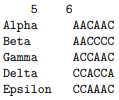

Se você quiser iniciar uma árvore filogenética usando as ferramentas do PHYLIP, um dos primeiros passos será criar um conjunto de muitos alinhamentos reamostrados usando a ferramenta bootseq. Isso nos retornará algo parecido com isso:

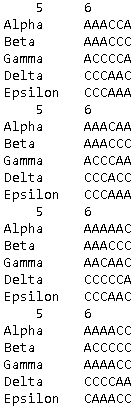

Vale lembrar que como é um exemplo, são poucos os alinhamentos mostrados, em casos da vida real são inúmeros dados de alinhamento.

Se você quiser ler o arquivo usando o Biopython basta fazer isso:

In [8]:
from Bio import AlignIO
alinhamentos = AlignIO.parse('resampled.phy', 'phylip')
for alinhamento in alinhamentos:
    print(alinhamento)
    print('\n')

Alignment with 5 rows and 6 columns
AAACCA Alpha
AAACCC Beta
ACCCCA Gamma
CCCAAC Delta
CCCAAA Epsilon


Alignment with 5 rows and 6 columns
AAACAA Alpha
AAACCC Beta
ACCCAA Gamma
CCCACC Delta
CCCAAA Epsilon


Alignment with 5 rows and 6 columns
AAAAAC Alpha
AAACCC Beta
AACAAC Gamma
CCCCCA Delta
CCCAAC Epsilon


Alignment with 5 rows and 6 columns
AAAACC Alpha
ACCCCC Beta
AAAACC Gamma
CCCCAA Delta
CAAACC Epsilon




Assim como o `Bio.SeqIO.parse()`, usar o `Bio.AlignIO.parse()` retornará um iterador. Se você quiser manter todos os alinhamentos na memória de uma vez, que pode ser acessados em qualquer ordem, basta transformar o iterador em uma lista:

In [9]:
from Bio import AlignIO
alinhamentos = list(AlignIO.parse('resampled.phy', 'phylip'))

In [10]:
primeiro_alinhamento = alinhamentos[0]
primeiro_alinhamento

<<class 'Bio.Align.MultipleSeqAlignment'> instance (5 records of length 6) at 481b295250>

In [11]:
ultimo_alinhamento = alinhamentos[-1]
ultimo_alinhamento

<<class 'Bio.Align.MultipleSeqAlignment'> instance (5 records of length 6) at 481b295b20>

### 6.1.3 Alinhamentos ambíguos

Muitos formatos de arquivo de alinhamento podem armazenar explicitamente mais de um alinhamento e a divisão entre eles é bem clara. Todavia, quando um formato de arquivo de sequência geral é usado, essa estrutura de bloco não existe. A situação mais comum de acontecer é quando os alinhamentos são salvos em arquivos FASTA. Cosidere a seguir como exemplo:

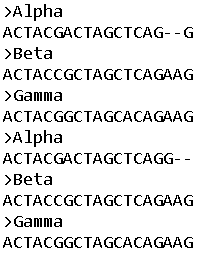

Este poderia ser um simples alinhamento contendo seis sequências (com os identificadores repetidos). Ou, julgando pelos identificadores, estes provavelmente são dois alinhamentos diferentes, cada um com três sequências, todos com o mesmo comprimento. Mas e com o exemplo abaixo?

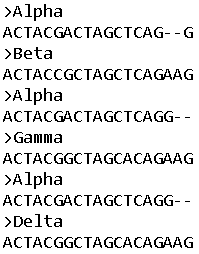

Novamente, este poderia ser um simples alinhamento com seis sequências. Todavia, desta vez, com base nos identificadores, podemos supor que se trata de três alinhamentos de pares que, por acaso, possuem o mesmo comprimento. O exemplo final é similar:

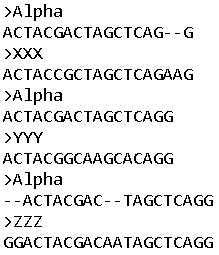

Neste exemplo, não podemos tratar como um único alinhamento como seis registros por conta dos comprimentos serem distintos. Por outro lado, as sequências podem serem interpretadas como três alinhamentos de pares.

Como podemos notar, armazenar mais de um alinhamento em arquivo FASTA não é o ideal. Entretanto, se você é forçado a trabalhar com eles como arquivos de entrada, o `Bio.AlignIO` pode lidar com a situação mais comum em que todos os alinhamentos possuem o mesmo número de registros. Um exemplo disso é uma coleção de alinhamentos de pares, que pode ser gerado pelas ferramentas water e needle do EMBOSS, embora nessa situação, o `Bio.AlignIO` consegue entender a saída nativa usando a string 'emboss' no segundo argumento.

Para interpretar os exemplos do arquivo FASTA como vários alinhamentos separados, podemos usar o `Bio.AlignIO.parse()` com o argumento **seq_count** que especifica quantas sequências são esperadas por cada alinhamento (3, 2 e 2; respectivamente). Como exemplo de código vamos usar o terceiro exemplo (o arquivo está no mesmo repositório que este documento):

In [12]:
from Bio import AlignIO
for alinhamento in AlignIO.parse('handle.fasta', 'fasta', seq_count=2):
    for registro in alinhamento:
        print(f'{registro.seq} - {registro.id}')
    print('\n')

ACTACGACTAGCTCAG--G - Alpha
ACTACCGCTAGCTCAGAAG - XXX


ACTACGACTAGCTCAGG - Alpha
ACTACGGCAAGCACAGG - YYY


--ACTACGAC--TAGCTCAGG - Alpha
GGACTACGACAATAGCTCAGG - ZZZ




Usar as funções **read** ou **parse** sem o argumento **seq_count** retornaria um único alinhamento contendo todos os seis registros para os primeiros exemplos. Para o terceiro exemplo, um exceção seria levantada porque os comprimentos das sequências diferem, evitando que eles sejam transformados um único alinhamento.

Se o formato de arquivo tiver uma estrutura de blocos permitido pelo `Bio.AlignIO` para determinar o número de sequências em cada alinhamento, o argumento **seq_count** não é necessário. Se fornecido mas não concondar com o conteúdo do arquivo, será retornado um erro.

Observe que o argumento **seq_count** é opcional e assume cada alinhamento no arquivo tem o mesmo número de sequências. Hipoteticamente você pode cair em situações estranhas, por exemplo, um arquivo FASTA contendo vários alinhamentos com cada um tendo diferentes quantidades de sequências. Supondo que você não possa obter os dados em um formato de arquivo mais adequado, não existe uma maneira direta de lidar com isso usando o `Bio.AlignIO`. Nesse caso, você pode considerar a leitura das sequências do arquivo em questão usando o `Bio.SeqIO` e agrupá-las para criar os alinhamentos conforme apropriado.

## 6.2 Escrevendo alinhamentos

Falamos até agora sobre o `Bio.AlignIO.read()` e `Bio.AlignIO.parse()` para alinhamentos como entrada das análises (leitura dos arquivos basicamente), e agora veremos o `Bio.AlignIO.write()` para escrever os alinhamentos como saída. Essa função necessita de três argumentos: alguns objetos **MultipleSeqAlignment**, um identificador ou o nome do arquivo e o formato de saída do arquivo.

Abaixo segue um exemplo onde começaremos escrevendo alguns objetos **MultipleSeqAlignment** do método *rock'n'roll racing'*, ou seja, na mão! Observe que serão construídos vários objsros **SeqRecord** em forma de alinhamento:

In [13]:
from Bio.Seq import Seq
from Bio.SeqRecord import SeqRecord
from Bio.Align import MultipleSeqAlignment

alinhamento_1 = MultipleSeqAlignment(
[
    SeqRecord(Seq('ACTGCTAGCTAG'), id='Alpha'),
    SeqRecord(Seq('ACT-CTAGCTAG'), id='Beta'),
    SeqRecord(Seq('ACTGCTAGDTAG'), id='Gamma')
]
)

alinhamento_2 = MultipleSeqAlignment(
[
    SeqRecord(Seq('GTCAGC-AG'), id='Delta'),
    SeqRecord(Seq('GACAGCTAG'), id='Epsilon'),
    SeqRecord(Seq('GTCAGCTAG'), id='Zeta')
]
)

alinhamento_3 = MultipleSeqAlignment(
[
    SeqRecord(Seq('ACTAGTACAGCTG'), id='Eta'),
    SeqRecord(Seq('ACTAGTACAGCT-'), id='Theta'),
    SeqRecord(Seq('-CTACTACAGGTG'), id='Iota')
]
)

meus_alinhamentos = [alinhamento_1, alinhamento_2, alinhamento_3]

Agora temos uma lista com objetos **Alignment**. Vamos escrevê-los em um arquivo PHYLIP:

In [14]:
from Bio import AlignIO
AlignIO.write(meus_alinhamentos, 'meu_exemplo.phy', 'phylip')

3

Se você abrir o arquivo criado, terá algo parecido com isso:

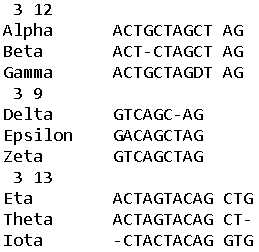

É mais comum você querer carregar um arquivo com um alinhamento já existente e salvá-lo após uma manipulação simples, como remover certas linhas e colunas.

Para saber quantos alinhamentos foram escritos no arquivo, você pode usar a função **len**, mas o Biopython já retorna automaticamente essa quantidade quando cria o arquivo. Vale lembrar que se você chamar a função **write** com um arquivo que já existe, o novo arquivo será sobrescrito no antigo.

### 6.2.1 Conversão entre formatos de arquivo de alinhamento de sequência

Converção entre arquivos de alinhamento de sequências com `Bio.AlignIO` funciona da mesma maneira que o `Bio.SeqIO` (ver a **Seção 5.5.2** do Capítulo 5: https://github.com/GTL98/biopython_br/tree/main/Cap%205%20-%20Sequ%C3%AAncias%20Input_Output). Geralmente carregamos o(s) alinhamento(s) com a função **parse** e salvamos a análise com a função **write**, ou para ficar mais simples usamos a função **convert**.

Por exemplo, vamos carregar o arquivo PFAM/Stockholm e salvar as informações em um arquivo usado pelo ClustalW:

In [15]:
from Bio import AlignIO
conversor = AlignIO.convert('PF05371_seed.sth', 'stockholm', 'PF05371_seed.aln', 'clustal')
print(f'Foram convertidos {conversor} alinhamentos.')

Foram convertidos 1 alinhamentos.


Ou podemos usar as funções **parse** e **write**:

In [16]:
from Bio import AlignIO
alinhamentos = AlignIO.parse('PF05371_seed.sth', 'stockholm')
conversor = AlignIO.write(alinhamentos, 'PF05371_seed.aln', 'clustal')
print(f'Foram convertidos {conversor} alinhamentos.')

Foram convertidos 1 alinhamentos.


A função **write** espera que seja forneceido vários objetos de alinhamento. No exemplo acima, fornecemos o iterador retornado pela função **parse**.

Nesse caso, sabemos que há somente um alinhamento no arquivo, então poderiamos usar a função **read**. Porém, temos que passar o alinhamento para a função **write** como um elemento de lista:

In [17]:
from Bio import AlignIO
alinhamento = AlignIO.read('PF05371_seed.sth', 'stockholm')
AlignIO.write([alinhamento], 'PF05371_seed.aln', 'clustal')

1

Independente do modo como você fará a conversão, você deve ter as informações do arquivo iguais a essa:

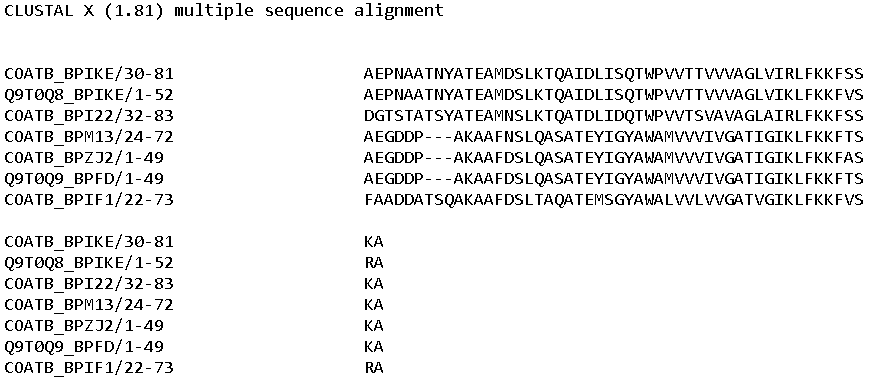

De outra maneira, você pode converter o arquivo para o formato PHYLIP:

In [18]:
from Bio import AlignIO
AlignIO.convert('PF05371_seed.sth', 'stockholm', 'PF05371_seed.phy', 'phylip')

1

O conteúdo do arquivo deverá ser assim:

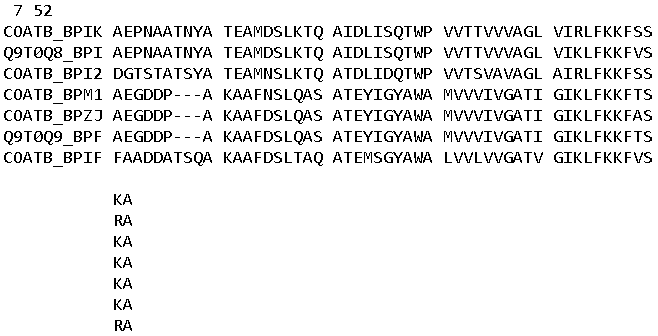

Uma das grandes desvantagens do formato de arquivo de alinhamento PHYLIP original é qe os identificadores de sequência são limitados para 10 caracteres. Neste exemplo, você pode ver que os nomes das sequências são únicos, mas não muito legíveis. Por conta disso, há uma variante do formato PHYLIP que amplamente usado atualmente:

In [19]:
from Bio import AlignIO
AlignIO.convert('PF05371_seed.sth', 'stockholm', 'PF05371_seed_phy_relaxed.phy', 'phylip-relaxed')

1

Agora a identificação das sequências fica completa e mais legível:

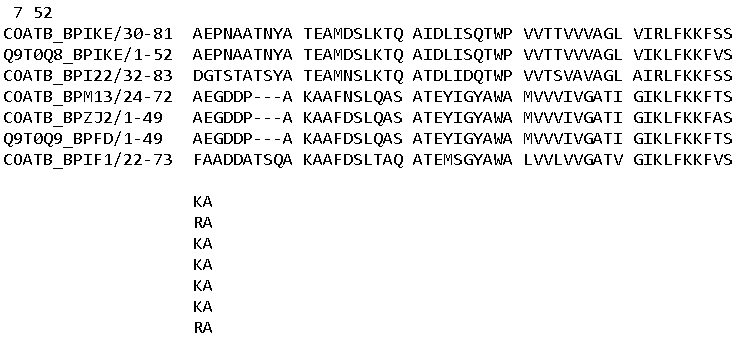

Se você tiver que trabalhar com o foramto original do PHYLIP, você precisará compactar os identificadores de alguma meneira, o atribuir seus próprios nomes ou sistema de numeração. Abaixo segue um código para manipular o registro dos identificadores antes de salvar em um arquivo:

In [20]:
from Bio import AlignIO
alinhamento = AlignIO.read('PF05371_seed.sth', 'stockholm')
nome_editado = {}
for i, registro in enumerate(alinhamento):
    nome_editado[i] = registro.id
    registro.id = f'seq{i}'
print(nome_editado)

{0: 'COATB_BPIKE/30-81', 1: 'Q9T0Q8_BPIKE/1-52', 2: 'COATB_BPI22/32-83', 3: 'COATB_BPM13/24-72', 4: 'COATB_BPZJ2/1-49', 5: 'Q9T0Q9_BPFD/1-49', 6: 'COATB_BPIF1/22-73'}


In [21]:
from Bio import AlignIO
AlignIO.write([alinhamento], 'PF05371_seed_editado.phy', 'phylip')

1

Agora temos um arquivo PHYLIP com novos identificadores:

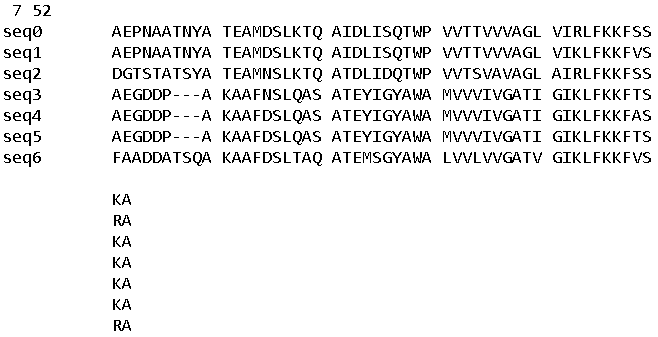

De modo geral, devido a limitação de caracteres dos identificadores, trabalhar com arquivos PHYLIP com essa formatação não deve ser a primeira escolha. Usar o formato PFAM/Stockholm, por outro lado, permite que você grave muitas anotações adicionais também.

### 6.2.2 Obter os objetos de alinhamento em formato de strings

A interface do `Bio.AlignIO` é baseada em identificadores, que significa que se você quer o(s) alinhamento(s) em forma de string vindo de um tipo de arquivo, você terá um pouco de trabalho. Todavia, você certamente chamará a função **format** do Python para essa tarefa. Vale lembrar que o formato de saída deve ser aceito pelo `Bio.AlignIO`:

In [22]:
from Bio import AlignIO
alinhamento = AlignIO.read('PF05371_seed.sth', 'stockholm')
print(format(alinhamento, 'clustal'))

CLUSTAL X (1.81) multiple sequence alignment


COATB_BPIKE/30-81                   AEPNAATNYATEAMDSLKTQAIDLISQTWPVVTTVVVAGLVIRLFKKFSS
Q9T0Q8_BPIKE/1-52                   AEPNAATNYATEAMDSLKTQAIDLISQTWPVVTTVVVAGLVIKLFKKFVS
COATB_BPI22/32-83                   DGTSTATSYATEAMNSLKTQATDLIDQTWPVVTSVAVAGLAIRLFKKFSS
COATB_BPM13/24-72                   AEGDDP---AKAAFNSLQASATEYIGYAWAMVVVIVGATIGIKLFKKFTS
COATB_BPZJ2/1-49                    AEGDDP---AKAAFDSLQASATEYIGYAWAMVVVIVGATIGIKLFKKFAS
Q9T0Q9_BPFD/1-49                    AEGDDP---AKAAFDSLQASATEYIGYAWAMVVVIVGATIGIKLFKKFTS
COATB_BPIF1/22-73                   FAADDATSQAKAAFDSLTAQATEMSGYAWALVVLVVGATVGIKLFKKFVS

COATB_BPIKE/30-81                   KA
Q9T0Q8_BPIKE/1-52                   RA
COATB_BPI22/32-83                   KA
COATB_BPM13/24-72                   KA
COATB_BPZJ2/1-49                    KA
Q9T0Q9_BPFD/1-49                    KA
COATB_BPIF1/22-73                   RA





Se não for informado o formato de saída, será retornado uma string.

Como descrito na **Seção 4.6** do Capítulo 4 (https://github.com/GTL98/biopython_br/tree/main/Cap%204%20-%20Objetos%20de%20anota%C3%A7%C3%A3o%20de%20sequ%C3%AAncia), o objeto **SeqRecord** possui um método similar que usa os formatos de saída suportados pelo `Bio.SeqIO`.

Internamente, a função **format** está chamando o `Bio.AlignIO.write()` com um identificador **StringIO**. Você pode fazer isso em seu código como exemplo se estiver usando versões antigas do Biopython:

In [23]:
from io import StringIO
from Bio import AlignIO
alinhamentos = AlignIO.parse('PF05371_seed.sth', 'stockholm')
saida_identificador = StringIO()
AlignIO.write(alinhamentos, saida_identificador, 'clustal')

1

In [24]:
dados_clustal = saida_identificador.getvalue()
print(dados_clustal)

CLUSTAL X (1.81) multiple sequence alignment


COATB_BPIKE/30-81                   AEPNAATNYATEAMDSLKTQAIDLISQTWPVVTTVVVAGLVIRLFKKFSS
Q9T0Q8_BPIKE/1-52                   AEPNAATNYATEAMDSLKTQAIDLISQTWPVVTTVVVAGLVIKLFKKFVS
COATB_BPI22/32-83                   DGTSTATSYATEAMNSLKTQATDLIDQTWPVVTSVAVAGLAIRLFKKFSS
COATB_BPM13/24-72                   AEGDDP---AKAAFNSLQASATEYIGYAWAMVVVIVGATIGIKLFKKFTS
COATB_BPZJ2/1-49                    AEGDDP---AKAAFDSLQASATEYIGYAWAMVVVIVGATIGIKLFKKFAS
Q9T0Q9_BPFD/1-49                    AEGDDP---AKAAFDSLQASATEYIGYAWAMVVVIVGATIGIKLFKKFTS
COATB_BPIF1/22-73                   FAADDATSQAKAAFDSLTAQATEMSGYAWALVVLVVGATVGIKLFKKFVS

COATB_BPIKE/30-81                   KA
Q9T0Q8_BPIKE/1-52                   RA
COATB_BPI22/32-83                   KA
COATB_BPM13/24-72                   KA
COATB_BPZJ2/1-49                    KA
Q9T0Q9_BPFD/1-49                    KA
COATB_BPIF1/22-73                   RA





## 6.3 Manipulando alinhamentos

Agora que aprendemos a carregar e salvar os alinhamentos, vamos olhar o que mais podemos fazer com eles.

### 6.3.1 Fatiando alinhamentos

Primeiro de tudo: em alguns momentos os objetos de alinhamento atuarão como uma lista Python de objetos **SeqRecord** (as linhas). Com isso explicado, ações de **len** (número de linhas) e iteração (cada linha é um objeto **SeqRecord**) faz mais sentido:

In [25]:
from Bio import AlignIO
alinhamento = AlignIO.read('PF05371_seed.sth', 'stockholm')
print(f'Número de linhas: {len(alinhamento)}')

Número de linhas: 7


In [26]:
for registro in alinhamento:
    print(f'{registro.seq} - {registro.id}')

AEPNAATNYATEAMDSLKTQAIDLISQTWPVVTTVVVAGLVIRLFKKFSSKA - COATB_BPIKE/30-81
AEPNAATNYATEAMDSLKTQAIDLISQTWPVVTTVVVAGLVIKLFKKFVSRA - Q9T0Q8_BPIKE/1-52
DGTSTATSYATEAMNSLKTQATDLIDQTWPVVTSVAVAGLAIRLFKKFSSKA - COATB_BPI22/32-83
AEGDDP---AKAAFNSLQASATEYIGYAWAMVVVIVGATIGIKLFKKFTSKA - COATB_BPM13/24-72
AEGDDP---AKAAFDSLQASATEYIGYAWAMVVVIVGATIGIKLFKKFASKA - COATB_BPZJ2/1-49
AEGDDP---AKAAFDSLQASATEYIGYAWAMVVVIVGATIGIKLFKKFTSKA - Q9T0Q9_BPFD/1-49
FAADDATSQAKAAFDSLTAQATEMSGYAWALVVLVVGATVGIKLFKKFVSRA - COATB_BPIF1/22-73


Você pode usar os métodos **append** e **extend** de listas Python aqui também. Da mesma forma que uma lista, quando você fizer o fatiamento de um alinhamento; ele devolverá as linhas selecionadas como outro objeto de alinhamento:

In [27]:
print(alinhamento)

Alignment with 7 rows and 52 columns
AEPNAATNYATEAMDSLKTQAIDLISQTWPVVTTVVVAGLVIRL...SKA COATB_BPIKE/30-81
AEPNAATNYATEAMDSLKTQAIDLISQTWPVVTTVVVAGLVIKL...SRA Q9T0Q8_BPIKE/1-52
DGTSTATSYATEAMNSLKTQATDLIDQTWPVVTSVAVAGLAIRL...SKA COATB_BPI22/32-83
AEGDDP---AKAAFNSLQASATEYIGYAWAMVVVIVGATIGIKL...SKA COATB_BPM13/24-72
AEGDDP---AKAAFDSLQASATEYIGYAWAMVVVIVGATIGIKL...SKA COATB_BPZJ2/1-49
AEGDDP---AKAAFDSLQASATEYIGYAWAMVVVIVGATIGIKL...SKA Q9T0Q9_BPFD/1-49
FAADDATSQAKAAFDSLTAQATEMSGYAWALVVLVVGATVGIKL...SRA COATB_BPIF1/22-73


In [28]:
print(alinhamento[3:7])

Alignment with 4 rows and 52 columns
AEGDDP---AKAAFNSLQASATEYIGYAWAMVVVIVGATIGIKL...SKA COATB_BPM13/24-72
AEGDDP---AKAAFDSLQASATEYIGYAWAMVVVIVGATIGIKL...SKA COATB_BPZJ2/1-49
AEGDDP---AKAAFDSLQASATEYIGYAWAMVVVIVGATIGIKL...SKA Q9T0Q9_BPFD/1-49
FAADDATSQAKAAFDSLTAQATEMSGYAWALVVLVVGATVGIKL...SRA COATB_BPIF1/22-73


Mas e se você quiser selecionar por coluna? Se você estiver familiarizado com o NumPy, funciona da mesma maneira que uma matriz ou array; você deve usar o índice duplo: o primeiro representando a linha e o segundo a coluna:

In [29]:
print(alinhamento[2, 6])

T


Usar dois números inteiros é uma abreviação para isso (nesse exemplo):

In [30]:
print(alinhamento[2].seq[6])

T


Você pode chamar todos os valores de uma determinada coluna:

In [31]:
print(alinhamento[:, 6])

TTT---T


Você também pode selecionar o intervalo das colunas. Por exemplo, para selecionar as três primeiras linhas seleciondas anteriormente, mas pegar somente as seis primeiras colunas:

In [32]:
print(alinhamento[3:6, :6])

Alignment with 3 rows and 6 columns
AEGDDP COATB_BPM13/24-72
AEGDDP COATB_BPZJ2/1-49
AEGDDP Q9T0Q9_BPFD/1-49


Deixar o índice da coluna como **':'** indica que é para selecionar todas as colunas:

In [33]:
print(alinhamento[:, :6])

Alignment with 7 rows and 6 columns
AEPNAA COATB_BPIKE/30-81
AEPNAA Q9T0Q8_BPIKE/1-52
DGTSTA COATB_BPI22/32-83
AEGDDP COATB_BPM13/24-72
AEGDDP COATB_BPZJ2/1-49
AEGDDP Q9T0Q9_BPFD/1-49
FAADDA COATB_BPIF1/22-73


Isso nos leva a uma maneira simples de remover uma seção. Observe que as colunas 7, 8 e 9 possuem gaps em três das sete sequências:

In [34]:
print(alinhamento[:, 6:9])

Alignment with 7 rows and 3 columns
TNY COATB_BPIKE/30-81
TNY Q9T0Q8_BPIKE/1-52
TSY COATB_BPI22/32-83
--- COATB_BPM13/24-72
--- COATB_BPZJ2/1-49
--- Q9T0Q9_BPFD/1-49
TSQ COATB_BPIF1/22-73


Novamente, você pode selecionar as colunas que aparecerão. Nesse caso começará na coluna 9 e irá até o final:

In [35]:
print(alinhamento[:, 9:])

Alignment with 7 rows and 43 columns
ATEAMDSLKTQAIDLISQTWPVVTTVVVAGLVIRLFKKFSSKA COATB_BPIKE/30-81
ATEAMDSLKTQAIDLISQTWPVVTTVVVAGLVIKLFKKFVSRA Q9T0Q8_BPIKE/1-52
ATEAMNSLKTQATDLIDQTWPVVTSVAVAGLAIRLFKKFSSKA COATB_BPI22/32-83
AKAAFNSLQASATEYIGYAWAMVVVIVGATIGIKLFKKFTSKA COATB_BPM13/24-72
AKAAFDSLQASATEYIGYAWAMVVVIVGATIGIKLFKKFASKA COATB_BPZJ2/1-49
AKAAFDSLQASATEYIGYAWAMVVVIVGATIGIKLFKKFTSKA Q9T0Q9_BPFD/1-49
AKAAFDSLTAQATEMSGYAWALVVLVVGATVGIKLFKKFVSRA COATB_BPIF1/22-73


Agora mais uma coisa interessante que você pode fazer com os objetos de alinhamento. Abaixo será mostrado como você pode remover um bloco de colunas:

In [36]:
editado = alinhamento[:, :6] + alinhamento[:, 9:]
print(editado)

Alignment with 7 rows and 49 columns
AEPNAAATEAMDSLKTQAIDLISQTWPVVTTVVVAGLVIRLFKKFSSKA COATB_BPIKE/30-81
AEPNAAATEAMDSLKTQAIDLISQTWPVVTTVVVAGLVIKLFKKFVSRA Q9T0Q8_BPIKE/1-52
DGTSTAATEAMNSLKTQATDLIDQTWPVVTSVAVAGLAIRLFKKFSSKA COATB_BPI22/32-83
AEGDDPAKAAFNSLQASATEYIGYAWAMVVVIVGATIGIKLFKKFTSKA COATB_BPM13/24-72
AEGDDPAKAAFDSLQASATEYIGYAWAMVVVIVGATIGIKLFKKFASKA COATB_BPZJ2/1-49
AEGDDPAKAAFDSLQASATEYIGYAWAMVVVIVGATIGIKLFKKFTSKA Q9T0Q9_BPFD/1-49
FAADDAAKAAFDSLTAQATEMSGYAWALVVLVVGATVGIKLFKKFVSRA COATB_BPIF1/22-73


Outro comum uso dessas ferramentas nos alinhamentos é combinar alinhamentos de diferentes genes em um meta-alinhamento. Mas cuidado, os identificadores devem ser iguais. Para mais informações, veja a **Seção 4.8** do Capítulo 4: (https://github.com/GTL98/biopython_br/tree/main/Cap%204%20-%20Objetos%20de%20anota%C3%A7%C3%A3o%20de%20sequ%C3%AAncia). Você pode achar útil primeiro ordenar alfebaticamente pelo **id** as sequências de alinhamento:

In [37]:
editado.sort()
print(editado)

Alignment with 7 rows and 49 columns
DGTSTAATEAMNSLKTQATDLIDQTWPVVTSVAVAGLAIRLFKKFSSKA COATB_BPI22/32-83
FAADDAAKAAFDSLTAQATEMSGYAWALVVLVVGATVGIKLFKKFVSRA COATB_BPIF1/22-73
AEPNAAATEAMDSLKTQAIDLISQTWPVVTTVVVAGLVIRLFKKFSSKA COATB_BPIKE/30-81
AEGDDPAKAAFNSLQASATEYIGYAWAMVVVIVGATIGIKLFKKFTSKA COATB_BPM13/24-72
AEGDDPAKAAFDSLQASATEYIGYAWAMVVVIVGATIGIKLFKKFASKA COATB_BPZJ2/1-49
AEPNAAATEAMDSLKTQAIDLISQTWPVVTTVVVAGLVIKLFKKFVSRA Q9T0Q8_BPIKE/1-52
AEGDDPAKAAFDSLQASATEYIGYAWAMVVVIVGATIGIKLFKKFTSKA Q9T0Q9_BPFD/1-49


Note que só podemos adicionar dois alinhamentos juntos se tiverem o mesmo número de linhas.

### 6.3.2 Alinhamentos como arrays

Dependendo do trabalho que você estiver fazendo, será mais fácil transformar os objetos de alinhamento como arrays de letras. Você pode fazer isso com a biblioteca NumPy (para mais informações, acesse: https://numpy.org/):

In [38]:
import numpy as np
from Bio import AlignIO
alinhamento = AlignIO.read('PF05371_seed.sth', 'stockholm')
alinhamento_array = np.array([list(rec) for rec in alinhamento], np.character)
print(f'Shape do alinhamento: {alinhamento_array.shape[0]} linhas por {alinhamento_array.shape[1]} colunas.')

Shape do alinhamento: 7 linhas por 52 colunas.


<ipython-input-38-5f9a10a0b69d>:4: DeprecationWarning: Converting `np.character` to a dtype is deprecated. The current result is `np.dtype(np.str_)` which is not strictly correct. Note that `np.character` is generally deprecated and 'S1' should be used.
  alinhamento_array = np.array([list(rec) for rec in alinhamento], np.character)


Se você estiver trabalhando intensamente com as colunas, você pode dizer ao NumPy para armazenar a matriz por coluna (como ocorre na linguagem de programação Fortran), ao contrário do padrão que é por linha (como na linguagem de programação C):

In [39]:
alinhamento_array = np.array([list(rec) for rec in alinhamento], np.character, order='F')
print(f'Shape do alinhamento: {alinhamento_array.shape[0]} linhas por {alinhamento_array.shape[1]} colunas.')

Shape do alinhamento: 7 linhas por 52 colunas.


<ipython-input-39-49d007e100ec>:1: DeprecationWarning: Converting `np.character` to a dtype is deprecated. The current result is `np.dtype(np.str_)` which is not strictly correct. Note that `np.character` is generally deprecated and 'S1' should be used.
  alinhamento_array = np.array([list(rec) for rec in alinhamento], np.character, order='F')


Observe que isso deixa o objeto de alinhamento Biopython original e o array NumPy na memória como objetos separados editar um não atualizará o outro!

## 6.4 Obtendo informações do alinhamento

### 6.4.1 Substiuições

O método **substitutions** do alinhamento relata com que frequência as letras de um alinhamento são substituídas por outras. Isso é calculado pegando todos os pares de linhas no alinhamento, contando o número de vezes que duas letras estão alinhadas uma com outra e somando isso em todos os pares. Por exemplo:

In [40]:
from Bio.Seq import Seq
from Bio.SeqRecord import SeqRecord
from Bio.Align import MultipleSeqAlignment
alinhamento = MultipleSeqAlignment(
[
    SeqRecord(Seq('ACTCCTA'), id='seq1'),
    SeqRecord(Seq('AAT-CTA'), id='seq2'),
    SeqRecord(Seq('CCTACT-'), id='seq3'),
    SeqRecord(Seq('TCTCCTC'), id='seq4')
]
)
print(alinhamento)

Alignment with 4 rows and 7 columns
ACTCCTA seq1
AAT-CTA seq2
CCTACT- seq3
TCTCCTC seq4


In [41]:
substituicao = alinhamento.substitutions
print(substituicao)

    A    C    T
A 2.0  4.5  1.0
C 4.5 10.0  0.5
T 1.0  0.5 12.0



Como a ordenação dos pares é arbitrária, as contagens são divididas igualmente acima e abaixo da diagonal. Por exemplo, os 9 alinhamentos de **A** com **C** como 4.5 na posição ['A', 'C] e 4.5 na posição ['C', 'A']. Esse arranjo ajuda a facilitar o cálculo da matriz de substituição a partir dessas contagens, como descrito na **Seção 20.4.2** do Capítulo 20 (***link do capítulo 20***).

Observe que o método **substitutions** contém entrada para as letras que aparecem apenas no alinhamento. Você pode usar o método **select** para adicionar as letras faltantes, por exemplo:

In [42]:
m = substituicao.select('ATCG')
print(m)

    A    T    C   G
A 2.0  1.0  4.5 0.0
T 1.0 12.0  0.5 0.0
C 4.5  0.5 10.0 0.0
G 0.0  0.0  0.0 0.0



Isso também permite que você altere a ordem alfebética das letras.

## 6.5 Ferramentas de alinhamento

Existem *vários* algoritmos para fazer os alinhamentos de sequência, tanto para alinhamento de pares e alinhamentos múltiplos de sequência. Os cálculos envolvidos nesses algoritmos são relativamente lentos, e acredito que você não quer escrever um algoritmo completo em Python para essa tarefa. Sabendo disso, o Biopython possui os módulo `Bio.pairwise2` escrito em C para melhorar a velocidade de desempenho, e a nova função **PairwiseAligner** do módulo `Bio.Align` (veja a **Seção 6.6.** para mais informações). Além disso, você pode chamar o Biopython para invocar uma ferramenta de linha de comando. Normalmente você faria:

1. Preparar um arquivo de entrada com as sequências desalinhadas, geralmente isso será feito em um arquivo FASTA que pode ser criado com o `Bio.SeqIO` (veja o Capítulo 5 para mais informações: https://github.com/GTL98/biopython_br/tree/main/Cap%205%20-%20Sequ%C3%AAncias%20Input_Output);

2. Chame a ferramenta de linha de comando para processar o arquivo de entrada, geralmente via linha de comando Biopython (será discutido nessa seção) e;

3. Ler a saída da ferramenta, isto é, a sequência alinhada, normalmente usando o módulo `Bio.AlignIO` (será visto mais tarde nesse capítulo).

Todas a linhas de comando que faremos nesse capítulo seguirão o mesmo estilo.

A maioria dos *wrappers* são definidos pelo módulo `Bio.Align.Applications`:

In [43]:
import Bio.Align.Applications
dir(Bio.Align.Applications)

['ClustalOmegaCommandline',
 'ClustalwCommandline',
 'DialignCommandline',
 'MSAProbsCommandline',
 'MafftCommandline',
 'MuscleCommandline',
 'PrankCommandline',
 'ProbconsCommandline',
 'TCoffeeCommandline',
 '_ClustalOmega',
 '_Clustalw',
 '_Dialign',
 '_MSAProbs',
 '_Mafft',
 '_Muscle',
 '_Prank',
 '_Probcons',
 '_TCoffee',
 '__all__',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__']

Ignore as entradas que começam com o *underline* (_), pois possuem um significado especial em Python. O módulo `Bio.Emboss.Applications` possui muitos *wrappers* para o pacote EMBOSS (http://emboss.sourceforge.net/), incluindo o **needle** e **water**, que serão descritos na **Seção 6.5.5**, e os *wrappers* para versões empacotadas EMBOSS para ferramentas PHYLIP (EMBOSS referencia esses pacotes como EMBOSSY, são ferramentas de terceiros com uma interface no mesmo estilo EMBOSS). Não vamos explorar todos esses alinhamentos nessa seção, apenas um exemplo, mas os mesmos princípios aplicam-se a todos eles.

### 6.5.1 ClustalW

ClustalW é uma ferramenta de linha de comando popular usada para alinhamentos múltiplos de sequência (há também uma interface gráfica chamada ClustalX). O módulo `Bio.Align.Applications` possui um *wrapper* para essa ferramenta de alinhamento (e muitas outras).

Antes de usar o ClustalW pelo Python, vamos ver quais são as possibilidades do ClustalW, além de você familiarizar-se com essa ferramenta. Você verá que o *wrapper* do Biopython é bem fiel a API da linha de comando:

In [44]:
from Bio.Align.Applications import ClustalwCommandline
help(ClustalwCommandline)

Help on class ClustalwCommandline in module Bio.Align.Applications._Clustalw:

class ClustalwCommandline(Bio.Application.AbstractCommandline)
 |  ClustalwCommandline(cmd='clustalw', **kwargs)
 |  
 |  Command line wrapper for clustalw (version one or two).
 |  
 |  http://www.clustal.org/
 |  
 |  Notes
 |  -----
 |  Last checked against versions: 1.83 and 2.1
 |  
 |  References
 |  ----------
 |  Larkin MA, Blackshields G, Brown NP, Chenna R, McGettigan PA,
 |  McWilliam H, Valentin F, Wallace IM, Wilm A, Lopez R, Thompson JD,
 |  Gibson TJ, Higgins DG. (2007). Clustal W and Clustal X version 2.0.
 |  Bioinformatics, 23, 2947-2948.
 |  
 |  Examples
 |  --------
 |  >>> from Bio.Align.Applications import ClustalwCommandline
 |  >>> in_file = "unaligned.fasta"
 |  >>> clustalw_cline = ClustalwCommandline("clustalw2", infile=in_file)
 |  >>> print(clustalw_cline)
 |  clustalw2 -infile=unaligned.fasta
 |  
 |  You would typically run the command line with clustalw_cline() or via
 |  the

Para o uso mais básico desta ferramenta, tudo o que você precisará é um arquivo FASTA de entrada (como o opuntia.fasta, que está no mesmo repositório desse arquivo). Esse é um pequeno arquivo FASTA que contém sete sequências de DNA do Figo da Índia (cacto da família *Opuntia*).

Por padrão, o ClustalW gerará um alinhamento e uma árvore filogenética com os nomes de identificação das sequências do arquivo FASTA, opuntia.aln e opuntia.dnd nesse caso, mas você pode substituir ou torná-lo explícito:

In [45]:
from Bio.Align.Applications import ClustalwCommandline
cline = ClustalwCommandline('clustalw2', infile='opuntia.fasta')
print(cline)

clustalw2 -infile=opuntia.fasta


Note que fornecemos o nome do executável como **clustalw2**, indicando que queremos usar a versão 2.X dois dos ClustalW, se você quiser usar a versão 1.X, use o valor padrão **clustalw**. Felizmente, ambas a versões são suportadas como os mesmos argumentos na linha de comando, e consequentemente, as mesmas funções.

Você pode achar que baixando instalando o Biopython em seu computador o ClustalW já venha instalado, mas ele é um programa que deve ser baixado separado. Você pode chamar essa ferramenta de duas formas, pelo PATH ou indicando o caminho no código. Por motivos didáticos faremos da segunda maneira, mas lembre-se que sempre que usar o ClustalW você deve informar o caminho do executável (pelo PATH não precisa indidcar o caminho sempre que chamar no código):

In [46]:
import os
from Bio.Align.Applications import ClustalwCommandline
clustalw_exe = r'D:\ClustalW\clustalw2.exe'
clustalw_cline = ClustalwCommandline(clustalw_exe, infile='opuntia.fasta')
assert os.path.isfile(clustalw_exe), 'ClustalW não foi econtrado.'
stdout, stderr = clustalw_cline()

Mostrar o **stdout** mostra a análise dos alinhamentos. O **stderr** mostra os erros que foram encontrados, nesse caso não teve:

In [47]:
print(stdout)




 CLUSTAL 2.1 Multiple Sequence Alignments


Sequence format is Pearson
Sequence 1: gi|6273291|gb|AF191665.1|AF191665   902 bp
Sequence 2: gi|6273290|gb|AF191664.1|AF191664   899 bp
Sequence 3: gi|6273289|gb|AF191663.1|AF191663   899 bp
Sequence 4: gi|6273287|gb|AF191661.1|AF191661   895 bp
Sequence 5: gi|6273286|gb|AF191660.1|AF191660   893 bp
Sequence 6: gi|6273285|gb|AF191659.1|AF191659   894 bp
Sequence 7: gi|6273284|gb|AF191658.1|AF191658   896 bp
Start of Pairwise alignments
Aligning...

Sequences (1:2) Aligned. Score:  99
Sequences (1:3) Aligned. Score:  99
Sequences (1:4) Aligned. Score:  98
Sequences (1:5) Aligned. Score:  98
Sequences (1:6) Aligned. Score:  98
Sequences (1:7) Aligned. Score:  98
Sequences (2:3) Aligned. Score:  99
Sequences (2:4) Aligned. Score:  98
Sequences (2:5) Aligned. Score:  98
Sequences (2:6) Aligned. Score:  98
Sequences (2:7) Aligned. Score:  98
Sequences (3:4) Aligned. Score:  98
Sequences (3:5) Aligned. Score:  98
Sequences (3:6) Aligned. Score:

Lembre-se que o Python reconhece alguns caracteres na string como caracteres especial (\n para pular linha e \t para tabulação são os mais conhecidos). Usar uma r-string indica ao Python para ler a string fornecida como realmente é, sem ler como caracteres especiais.

Agora, a patir desse ponto ajudará muito a saber como essa ferramenta de linha de comando "trabalha". Quando você usa uma ferramenta pela linha de comando, é mostrado diretamente na tela um texto de saída. Esse texto pode ser capturado ou redirecionado por dois "caminhos": um conhecido como *standard output* (os resultados normais) e o outro conhecido como *standard error* (usado para mensagens de erros e debugs). Também há um *standard input* que é qualquer texto inserido na ferramenta. Esses nomes são abreviados como **stdout**, **stderr** e **stdin**, respectivamente. Quando a ferramenta termina o seu trabalho, é retornado um código (uma variável inteiro para ser mais preciso), que por conveção é 0 para sucesso.

Quando você usar a ferramenta de linha de comando via *wrapper* do Biopython, ele espera terminar e verifica o código de retorno. Se retornar algo diferente de 0 (indicnado um erro), uma exceção é chamada. O *wrapper* retorna duas strings, **stdout** e **stderr**.

No caso do ClustalW, quando usamos a linha de comando todas as informações importantes são escritas nos arquivos de saída. Durante a análise, tudo é mostrado na tela enquanto você aguarda (via **stdout** e **stderr**), como é um processo chato; pode ser ignorado (assumindo que correu tudo bem na análise).

O que realmente nos interessa aqui são os arquivos de saída: o alinhamento e a árvore filogenética. Nós não informamos ao ClstalW qual o nome de arquivo usar, por padrão ele usa o nome do arquivo de entrada. Nesse caso, para o arquivo de alinhamento o arquivo será **opuntia.aln** e para a árvore filogenética, **opuntia.dnd**. Para o arquivo de alinhamento usremos o nosso conhecido `Bio.AlignIO`:

In [48]:
from Bio import AlignIO
alinhamento = AlignIO.read('opuntia.aln', 'clustal')
print(alinhamento)

Alignment with 7 rows and 906 columns
TATACATTAAAGAAGGGGGATGCGGATAAATGGAAAGGCGAAAG...AGA gi|6273285|gb|AF191659.1|AF191
TATACATTAAAGAAGGGGGATGCGGATAAATGGAAAGGCGAAAG...AGA gi|6273284|gb|AF191658.1|AF191
TATACATTAAAGAAGGGGGATGCGGATAAATGGAAAGGCGAAAG...AGA gi|6273287|gb|AF191661.1|AF191
TATACATAAAAGAAGGGGGATGCGGATAAATGGAAAGGCGAAAG...AGA gi|6273286|gb|AF191660.1|AF191
TATACATTAAAGGAGGGGGATGCGGATAAATGGAAAGGCGAAAG...AGA gi|6273290|gb|AF191664.1|AF191
TATACATTAAAGGAGGGGGATGCGGATAAATGGAAAGGCGAAAG...AGA gi|6273289|gb|AF191663.1|AF191
TATACATTAAAGGAGGGGGATGCGGATAAATGGAAAGGCGAAAG...AGA gi|6273291|gb|AF191665.1|AF191


Se você tiver interesse (assim como eu) em saber o parentesco entre as sequências, basta usar o arquivo **opuntia.dnd** para criar uma árvore filogenética em formato Newick com o `Bio.Phylo`:

In [49]:
from Bio import Phylo
arvore = Phylo.read('opuntia.dnd', 'newick')
Phylo.draw_ascii(arvore)

                             _______________ gi|6273291|gb|AF191665.1|AF191665
  __________________________|
 |                          |   ______ gi|6273290|gb|AF191664.1|AF191664
 |                          |__|
 |                             |_____ gi|6273289|gb|AF191663.1|AF191663
 |
_|_________________ gi|6273287|gb|AF191661.1|AF191661
 |
 |__________ gi|6273286|gb|AF191660.1|AF191660
 |
 |    __ gi|6273285|gb|AF191659.1|AF191659
 |___|
     | gi|6273284|gb|AF191658.1|AF191658



Veremos com mais detalhes as árvores filogenéticas no Capítulo 13 (***link do capítulo 13***)

### 6.5.2 MUSCLE

MUSCLE (**MU**ltiple **S**equence **C**omparison by **L**og-**E**xpectation) é a ferramenta de alinhamento múltiplos de sequência mais recente que o ClustalW, e o Biopython possui um *wrapper* com o módulo `Bio.Align.Applications`. Como feito antes, recomento você usar o MUSCLE com a linha de comando antes de tentar com o Python. Como o ClustalW, o MUSCLE também possui um menu ajuda no Biopython:

In [50]:
from Bio.Align.Applications import MuscleCommandline
help(MuscleCommandline)

Help on class MuscleCommandline in module Bio.Align.Applications._Muscle:

class MuscleCommandline(Bio.Application.AbstractCommandline)
 |  MuscleCommandline(cmd='muscle', **kwargs)
 |  
 |  Command line wrapper for the multiple alignment program MUSCLE.
 |  
 |  http://www.drive5.com/muscle/
 |  
 |  Notes
 |  -----
 |  Last checked against version: 3.7, briefly against 3.8
 |  
 |  References
 |  ----------
 |  Edgar, Robert C. (2004), MUSCLE: multiple sequence alignment with high
 |  accuracy and high throughput, Nucleic Acids Research 32(5), 1792-97.
 |  
 |  Edgar, R.C. (2004) MUSCLE: a multiple sequence alignment method with
 |  reduced time and space complexity. BMC Bioinformatics 5(1): 113.
 |  
 |  Examples
 |  --------
 |  >>> from Bio.Align.Applications import MuscleCommandline
 |  >>> muscle_exe = r"C:\Program Files\Alignments\muscle3.8.31_i86win32.exe"
 |  >>> in_file = r"C:\My Documents\unaligned.fasta"
 |  >>> out_file = r"C:\My Documents\aligned.fasta"
 |  >>> muscle_cl

Para esse exemplo, usaremos o arquivo FASTA usado na seção anterior. Você informar ao MUSCLE o arquivo FASTA de entrada e o arquivo de saída com o alinhamento:

In [51]:
from Bio.Align.Applications import MuscleCommandline
cline = MuscleCommandline(input='opuntia.fasta', out='opuntia.txt')
print(cline)

muscle -in opuntia.fasta -out opuntia.txt


Observe que o MUSCLE usa **-in** e **-out**, mas o Biopython usa **input** e **out** como palavras chaves para os argumentos. Isso ocorre porque **in** é uma palavra reservada Python.

Por padrão, o MUSCLE retorna os arquivos de saída no padrão FASTA. O módulo `Bio.AlignIO` deve conseguir ler o arquivo FASTA usando argumento **format='fasta'**. Você pode pedir que o arquivo de saída seja no padrão ClustalW:

In [52]:
from Bio.Align.Applications import MuscleCommandline
cline = MuscleCommandline(input='opuntia.fasta', out='opuntia.aln', clw=True)
print(cline)

muscle -in opuntia.fasta -out opuntia.aln -clw


Ou a saída do ClustalW estrita em que a linha do cabeçalho ClustalW original é usada para compatibilidade máxima:

In [53]:
from Bio.Align.Applications import MuscleCommandline
cline = MuscleCommandline(input='opuntia.fasta', out='opuntia.aln', clwstrict=True)
print(cline)

muscle -in opuntia.fasta -out opuntia.aln -clwstrict


O módulo `Bio.AlignIO` consegue ler esses alinhamentos usando o argumento **format='clustal'**.

O MUSCLE pode gerar arquivo de saída GCG e MSF, mas o Bipython não possui suporte para essas extensões de arquivo. Pode ser retornado também um arquivo HTML para ser lido na internet, mas não é recomendado para análise.

Você pode fornecer outros parâmetros opcionais, por exemplo o número máximos de iterações. Veja a função **help** desta seção para mais detalhes.

Você pode usar o MUSCLE como o ClustalW na seção anterior, e analisar o arquivo de saída com o `Bio.AlignIO`.

### 6.5.3 MUSCLE usando stdout

Usar a linha de comando do MUSCLE como nos exemplos acima, retornará em um arquivo de alinhamento. Isso indica que não haverá nenhuma informação importante gravada nos identificadores **stdout** e **stderr**. Todavia, por padrão, o MUSCLE escreverá o alinhamento no **stdout**. Podemos tirar vantagem disso para não gerar um arquivo de alinhamento temporário! Por exemplo:

In [54]:
from Bio.Align.Applications import MuscleCommandline
muscle_cline = MuscleCommandline(input='opuntia.fasta')
print(muscle_cline)

muscle -in opuntia.fasta


Se usarmos o *wrapper*, teremos como retorno a saída como uma string. Para analisar isso, podemos usar **StringIO** para transformar em um identificador. Vale lembrar que o MUSCLE usa como padrão o formato FASTA para saída:

In [55]:
from Bio.Align.Applications import MuscleCommandline
muscle_exe = r'D:\MUSCLE\muscle3.8.31_i86win32.exe'
muscle_cline = MuscleCommandline(muscle_exe, input='opuntia.fasta')
stdout, stderr = muscle_cline()

In [56]:
from io import StringIO
from Bio import AlignIO
alinhamento = AlignIO.read(StringIO(stdout), 'fasta')
print(alinhamento)

Alignment with 7 rows and 906 columns
TATACATTAAAGGAGGGGGATGCGGATAAATGGAAAGGCGAAAG...AGA gi|6273289|gb|AF191663.1|AF191663
TATACATTAAAGGAGGGGGATGCGGATAAATGGAAAGGCGAAAG...AGA gi|6273291|gb|AF191665.1|AF191665
TATACATTAAAGGAGGGGGATGCGGATAAATGGAAAGGCGAAAG...AGA gi|6273290|gb|AF191664.1|AF191664
TATACATTAAAGAAGGGGGATGCGGATAAATGGAAAGGCGAAAG...AGA gi|6273287|gb|AF191661.1|AF191661
TATACATAAAAGAAGGGGGATGCGGATAAATGGAAAGGCGAAAG...AGA gi|6273286|gb|AF191660.1|AF191660
TATACATTAAAGAAGGGGGATGCGGATAAATGGAAAGGCGAAAG...AGA gi|6273285|gb|AF191659.1|AF191659
TATACATTAAAGAAGGGGGATGCGGATAAATGGAAAGGCGAAAG...AGA gi|6273284|gb|AF191658.1|AF191658


O exemplo acima é bem simples, mas se você estiver trabalhando com uma saída de texto enorme, todas as informações de **stdout** e **stderr** estarão armazenadas na memória como uma string, o que deixará computador mais lento e até travar em um ponto onde você perdeu a sua análise. Usando o módulo `subprocess` do Python, podemos trabalhar diretamente com os indicadores:

In [57]:
import sys
import subprocess
from Bio.Align.Applications import MuscleCommandline
muscle_exe = r'D:\MUSCLE\muscle3.8.31_i86win32.exe'
muscle_cline = MuscleCommandline(muscle_exe, input='opuntia.fasta')
child = subprocess.Popen(str(muscle_cline),
                        stdout=subprocess.PIPE,
                        stderr=subprocess.PIPE,
                        universal_newlines=True,
                        shell=(sys.platform!='win32'))

In [58]:
from Bio import AlignIO
alinhamento = AlignIO.read(child.stdout, 'fasta')
print(alinhamento)

Alignment with 7 rows and 906 columns
TATACATTAAAGGAGGGGGATGCGGATAAATGGAAAGGCGAAAG...AGA gi|6273289|gb|AF191663.1|AF191663
TATACATTAAAGGAGGGGGATGCGGATAAATGGAAAGGCGAAAG...AGA gi|6273291|gb|AF191665.1|AF191665
TATACATTAAAGGAGGGGGATGCGGATAAATGGAAAGGCGAAAG...AGA gi|6273290|gb|AF191664.1|AF191664
TATACATTAAAGAAGGGGGATGCGGATAAATGGAAAGGCGAAAG...AGA gi|6273287|gb|AF191661.1|AF191661
TATACATAAAAGAAGGGGGATGCGGATAAATGGAAAGGCGAAAG...AGA gi|6273286|gb|AF191660.1|AF191660
TATACATTAAAGAAGGGGGATGCGGATAAATGGAAAGGCGAAAG...AGA gi|6273285|gb|AF191659.1|AF191659
TATACATTAAAGAAGGGGGATGCGGATAAATGGAAAGGCGAAAG...AGA gi|6273284|gb|AF191658.1|AF191658


### 6.5.4 MUSCLE usando stdin e stdout

Não precisamos realmente ter preparado o arquivo FASTA, uma vez que o MUSCLE por padrão lê a sequência de entrada como um **stdin**! Observe que isso é um pouco mais avançado e complicado, mas não se incomde com essa técnica, a menos que você precise dela.

Primeiramente, precisamos de algumas sequências desalinhadas na memória como objetos **SeqRecord**. Como demonstração, usaremos uma versão filtrada do arquivo FASTA usado nos exemplos anteriores, onde conterá 6 das 7 sequências:

In [59]:
from Bio import SeqIO
registros = (r for r in SeqIO.parse('opuntia.fasta', 'fasta') if len(r) < 900)

Agora criaremos uma linha de comando MUSCLE, deixando a entrada e saída com os padrões estabelecidos (**stdin** e **stdout**). Usaremos o formato estrito do ClustalW como saída:

In [60]:
from Bio.Align.Applications import MuscleCommandline
muscle_exe = r'D:\MUSCLE\muscle3.8.31_i86win32.exe'
muscle_cline = MuscleCommandline(muscle_exe, clwstrict=True)
print(muscle_cline)

D:\MUSCLE\muscle3.8.31_i86win32.exe -clwstrict


Em seguida, a parte complicada usando o módulo `subprocess`, **stdin** e **stdout**:

In [61]:
import sys
import subprocess
child = subprocess.Popen(str(muscle_cline),
                        stdin=subprocess.PIPE,
                        stdout=subprocess.PIPE,
                        stderr=subprocess.PIPE,
                        universal_newlines=True,
                        shell=(sys.platform!='win32'))

Isto deve iniciar o MUSCLE, mas se você ficará esperando pela sequências de entrada FASTA, que devemos fornecer pelo identificador **stdin**:

In [62]:
from Bio import SeqIO
SeqIO.write(registros, child.stdin, 'fasta')

6

In [63]:
child.stdin.close()

Depois de escrever as 6 sequências para o identificador, o MUSCLE esperará para ver se são somente essas sequências de FASTA ou não, por isso chamamos o método **close** para o identificador. A partir desse ponto, o MUSCLE deve estar inicializado e podemos solicitar que ele nos mostre a saída:

In [64]:
from Bio import AlignIO
alinhamento = AlignIO.read(child.stdout, 'clustal')
print(alinhamento)

Alignment with 6 rows and 900 columns
TATACATTAAAGGAGGGGGATGCGGATAAATGGAAAGGCGAAAG...AGA gi|6273290|gb|AF191664.1|AF19166
TATACATTAAAGGAGGGGGATGCGGATAAATGGAAAGGCGAAAG...AGA gi|6273289|gb|AF191663.1|AF19166
TATACATTAAAGAAGGGGGATGCGGATAAATGGAAAGGCGAAAG...AGA gi|6273287|gb|AF191661.1|AF19166
TATACATAAAAGAAGGGGGATGCGGATAAATGGAAAGGCGAAAG...AGA gi|6273286|gb|AF191660.1|AF19166
TATACATTAAAGAAGGGGGATGCGGATAAATGGAAAGGCGAAAG...AGA gi|6273285|gb|AF191659.1|AF19165
TATACATTAAAGAAGGGGGATGCGGATAAATGGAAAGGCGAAAG...AGA gi|6273284|gb|AF191658.1|AF19165


Uau! Temos um novo alinhamento com apenas 6 registros, sem criar um arquivo FASTA temporário de entrada ou um arquivo de alinhamento como saída. Contudo, um aviso: Lidar com erros com esse estilo de chamar programas externos é bem mais complicado. Também torna-se muito mais difícil para diagnosticar probelmas, porque você não pode usar o MUSCLE manualmente que não seja com o Biopython, uma vez que você não tem um arquivo de entrada. Também pode haver problemas sutis de plataforma cruzada (e.g. Windows x Linux) e como o código será usado pode tem impacto (e.g. direto da linha de comando, de uma IDLE ou IDE, de um script GUI). Esses são problemas genéricos do Python, não são exclusivos do Biopython.

Se você achar que trabalhar diretamente com o `subprocess` como esse é assustador, existe uma alternativa. Se você executar essas ferramente com **muscle_cline()**, você pode fornecer qualquer entrada padrão como uma grande string, **muscle_cline(stdin=...)**. Portanto, se os seus dados não forem enormes, você pode preparar a entrada FASTA na memória como uma string usando o **StringIO**. Para mais detalhes, veja a **Seção 24.1** do Capítulo 24 (***link do capítulo 24***):

In [65]:
from Bio import SeqIO
from io import StringIO
registros = (r for r in SeqIO.parse('opuntia.fasta', 'fasta') if len(r) < 900)
identificador = StringIO()
SeqIO.write(registros, identificador, 'fasta')

6

In [66]:
dados = identificador.getvalue()

Você pode usar a ferramenta e analisar o alinhamento da seguite maneira:

In [67]:
from Bio import AlignIO
from Bio.Align.Applications import MuscleCommandline
muscle_exe = r'D:\MUSCLE\muscle3.8.31_i86win32.exe'
muscle_cline = MuscleCommandline(muscle_exe, clwstrict=True)
stdout, stderr = muscle_cline(stdin=dados)
alinhamento = AlignIO.read(StringIO(stdout), 'clustal')
print(alinhamento)

Alignment with 6 rows and 900 columns
TATACATTAAAGGAGGGGGATGCGGATAAATGGAAAGGCGAAAG...AGA gi|6273290|gb|AF191664.1|AF19166
TATACATTAAAGGAGGGGGATGCGGATAAATGGAAAGGCGAAAG...AGA gi|6273289|gb|AF191663.1|AF19166
TATACATTAAAGAAGGGGGATGCGGATAAATGGAAAGGCGAAAG...AGA gi|6273287|gb|AF191661.1|AF19166
TATACATAAAAGAAGGGGGATGCGGATAAATGGAAAGGCGAAAG...AGA gi|6273286|gb|AF191660.1|AF19166
TATACATTAAAGAAGGGGGATGCGGATAAATGGAAAGGCGAAAG...AGA gi|6273285|gb|AF191659.1|AF19165
TATACATTAAAGAAGGGGGATGCGGATAAATGGAAAGGCGAAAG...AGA gi|6273284|gb|AF191658.1|AF19165


Você pode achar esse caminho mais fácil, mas necessita de mais memória RAM para as strings FASTA usadas como entrada e a saída como Clustal.

### 6.5.5 EMBOSS needle e water

O pacote EMBOSS inclui as ferramentas **needle** e **water** do algoritmo Needleman-Wunsch de alinhamento global e o algoritmo Smith-Waterman de alinhamento local. As ferramentas compartilham da mesma interface, então alternar entre as duas é algo comum.

Suponha que você queira fazer um alinhamento de pares global entre duas sequências no formato FASTA. Os arquivos **alpha.faa** e **beta.faa** estão no mesmo repositório desde arquivo.

Como não está mais disponível o programa para download, deixarei o link para essa ferramenta online; funciona igualmente se a linha de comando fosse rodada em sua máquina.

Link do EMBOSS online: https://www.ebi.ac.uk/Tools/emboss/

## 6.6 Alinhamento de sequência em pares

Alinhamento de sequência em pares é um processo de alinhamento de duas sequências onde cada uma é pareada a fim de otimizar a pontuação de similaridade entre cada uma. O Biopython possui duas funções de alinhamento em pares: a "antiga" `Bio.pairwise2` e a "nova" `Bio.Align.PairwiseAligner`, essa última adicioanda na versão 1.72 do Biopython. Ambos podem ser usados para alinhamento local e global, com uma gama de opções para mudar os parâmetros de alinhamento. Mesmo o **pairwise2** ganhando melhorias em sua velocidade e memória, o **PairwiseAligner** é muito mais rápido; portanto, se você precisar realizar vários alinhamentos com sequências realmente grandes, a segunda ferramenta é a mais adequada. Caso contrário, o **pairwise2** também consegue alinhar listas, o que pode ser útil se as sequências em análise não consistirem somente em caracteres únicos.

Informado os mesmos parâmetros e as mesmas sequências, ambos os alinhadores retornarão os mesmos alinhamentos e pontuações. Se o número de alinhamentos é muito alto, pode ser retornado diferentes sbsets para todo alinhamento válido.

### 6.6.1 pairwise2

`Bio.pairwise2` contém essencialmente os mesmo algoritmos do **water** (local) e **needle** (global) do pacote EMBOSS e devem retornar os mesmos resultados. A função **pairwise2** sofreu algumas optimizações em sua velocidade e consumo de memória (a partir da versão 1.67 do Biopython) para sequências curtas (alinhamento global: ~2000 resíduos, alinhamento local: ~600 resíduos) é mais rápido (ou igualmente rápido) usar o **pairwise2** do que usar o EMBOSS **water** ou **needle** via online.

Suponha que você queira fazar um alinhamento global de pares entre duas sequências de hemoglobina humana (HBA_HUMAN, HBB_HUMAN). Ambos os arquivos estão no mesmo repositório que este documento:

In [68]:
from Bio import SeqIO
from Bio import pairwise2
seq1 = SeqIO.read('alpha.faa', 'fasta')
seq2 = SeqIO.read('beta.faa', 'fasta')
alinhamentos = pairwise2.align.globalxx(seq1.seq, seq2.seq)

Como você pode ver, chamamos a função de alinhamento com **align.globalxx**. O truque aqui está nas duas últimas letras da função (nesse caso, **xx**), que são usadas para decodificar as pontuações e penalidades por pareamento (*matches*), despareamentos (*mismatches*) e lacunas (*gaps*). A primeira letra da função decodifica a pontuação de match, e.g. **x** indica que a cada match conta 1 e mismatch não conta. A segunda letra decodifica a pontuação para os gaps; **x** indica que gaps não serão pontuados. Para mais informações sobre as letras e todas as possibilidades da função **pairwise2**, acesse: https://biopython.org/docs/1.79/api/Bio.pairwise2.html. Logo, **globalxx** diz que apenas matches entre as sequências serão pontuadas.

A variável **alinhamentos** contém agora uma lista de alinhamentos que possui a mesma pontuação ideal para as condições fornecidas. Em nosso exemplo, temos 80 diferentes alinhamentos com um score de 72 (`Bio.pairwise2` pode retornar até 1000 alinhamentos). Vamos dar uma olhada em um desses alinhamentos:

In [69]:
len(alinhamentos)

80

In [70]:
print(alinhamentos[0])

Alignment(seqA='MV-LSPADKTNV---K-A--A-WGKVGAHAG---EY-GA-EALE-RMFLSF----PTTK-TY--FPHFDL-SH-G--S---AQVK-G------HGKKV--A--DA-LTNAVAHVD-DMPNALS----A-LSD-LHAH--KLR-VDPV-NFKL-LSHCL---LVT--LAAHLPA----EFTPA-VH-ASLDKFLAS---VSTV------LTS--KYR-', seqB='MVHL-----T--PEEKSAVTALWGKV-----NVDE-VG-GEAL-GR--L--LVVYP---WT-QRF--F--ES-FGDLSTPDA-V-MGNPKVKAHGKKVLGAFSD-GL----AH--LD--N-L-KGTFATLS-EL--HCDKL-HVDP-ENF--RL---LGNVLV-CVL-AH---HFGKEFTP-PV-QA------A-YQKV--VAGVANAL--AHKY-H', score=72.0, start=0, end=217)


Cada alinhamento é uma tupla que consiste de duas sequências alinhadas, a pontuação e a posição inicial e final dos alinhamentos (em alinhamento global, o começo é sempre no 0 e o final é o comprimento do alinhamento). `Bio.pairwise2` possui a função **format_alignment** para uma saída mais didática:

In [71]:
from Bio import pairwise2
print(pairwise2.format_alignment(*alinhamentos[0]))

MV-LSPADKTNV---K-A--A-WGKVGAHAG---EY-GA-EALE-RMFLSF----PTTK-TY--FPHFDL-SH-G--S---AQVK-G------HGKKV--A--DA-LTNAVAHVD-DMPNALS----A-LSD-LHAH--KLR-VDPV-NFKL-LSHCL---LVT--LAAHLPA----EFTPA-VH-ASLDKFLAS---VSTV------LTS--KYR-
|| |     |     | |  | ||||        |  |  |||  |  |      |    |   |  |   |  |  |   | |  |      |||||  |  |  |    ||   |  | |     | ||  |  |  ||  |||  ||   |   |   ||   | ||       ||||  |  |      |    |  |      |    ||  
MVHL-----T--PEEKSAVTALWGKV-----NVDE-VG-GEAL-GR--L--LVVYP---WT-QRF--F--ES-FGDLSTPDA-V-MGNPKVKAHGKKVLGAFSD-GL----AH--LD--N-L-KGTFATLS-EL--HCDKL-HVDP-ENF--RL---LGNVLV-CVL-AH---HFGKEFTP-PV-QA------A-YQKV--VAGVANAL--AHKY-H
  Score=72



Desde a versão 1.77 do Biopython, os parâmetros podem ser usados com palavras chaves. O exemplo acima ficaria assim:

In [72]:
alinhamentos = pairwise2.align.globalxx(sequenceA=seq1.seq, sequenceB=seq2.seq)

Melhores alinhamentos são obtidos quando os gaps são penalizados: altas penalizações para lacunas sozinhas (*gap open*) e penalizações mais baixas para lacunas em sequência (*gap extension*). Para pontuações de match de aminoácidos, geralmente são usadas matrizes como **PAM** ou **BLOSUM**. Desse modo, um alinhamento mais significativo para o nosso exemplo pode ser obtdo usando a matriz BLOSUM62, junto com uma penalização de gap open em 10 e gap extension em 0.5 (usando a função **globalds**):

In [73]:
from Bio import SeqIO
from Bio import pairwise2
from Bio.Align import substitution_matrices
blosum62 = substitution_matrices.load('BLOSUM62')
seq1 = SeqIO.read('alpha.faa', 'fasta')
seq2 = SeqIO.read('beta.faa', 'fasta')
alinhamentos = pairwise2.align.globalds(seq1.seq, seq2.seq,blosum62, -10, -0.5)
len(alinhamentos)

2

In [74]:
print(pairwise2.format_alignment(*alinhamentos[0]))

MV-LSPADKTNVKAAWGKVGAHAGEYGAEALERMFLSFPTTKTYFPHF-DLS-----HGSAQVKGHGKKVADALTNAVAHVDDMPNALSALSDLHAHKLRVDPVNFKLLSHCLLVTLAAHLPAEFTPAVHASLDKFLASVSTVLTSKYR
|| |.|..|..|.|.||||  ...|.|.|||.|.....|.|...|..| |||     .|...||.|||||..|.....||.|........||.||..||.|||.||.||...|...||.|...||||.|.|...|..|.|...|..||.
MVHLTPEEKSAVTALWGKV--NVDEVGGEALGRLLVVYPWTQRFFESFGDLSTPDAVMGNPKVKAHGKKVLGAFSDGLAHLDNLKGTFATLSELHCDKLHVDPENFRLLGNVLVCVLAHHFGKEFTPPVQAAYQKVVAGVANALAHKYH
  Score=292.5



O alinhamento acima tem a mesma pontuação que o **needle** do EMBOSS com as mesmas sequêcias e mesmos parâmetros.

Os alinhamentos locais são chamados da mesma maneira que os globais, mas a função é trocada por **local**. As letras funcionam da mesma maneira:

In [75]:
from Bio import pairwise2
from Bio.Align import substitution_matrices
blosum62 = substitution_matrices.load('BLOSUM62')
alinhamentos = pairwise2.align.localds('LSPADKTNVKAA', 'PEEKSAV', blosum62, -10, -1)
print(pairwise2.format_alignment(*alinhamentos[0]))

3 PADKTNV
  |..|..|
1 PEEKSAV
  Score=16



Se você usar as mesmas sequências e os mesmos parâmetros no site que está hospedado o algoritmo **water** do EMBOSS, você terá a mesma pontuação.

Nas versões recentes do Biopython, o método **format_alignment** mostra somente uma parte do alinhamento (começando na posição 1 como visto no exemplo acima). Se você estiver interessado na parte não alinhada das sequências, basta passar *True* para o parâmetro **full_sequences**:

In [76]:
from Bio import pairwise2
from Bio.Align import substitution_matrices
blosum62 = substitution_matrices.load('BLOSUM62')
alinhamentos = pairwise2.align.localds('LSPADKTNVKAA', 'PEEKSAV', blosum62, -10, -1)
print(pairwise2.format_alignment(*alinhamentos[0], full_sequences=True))

LSPADKTNVKAA
  |..|..|   
--PEEKSAV---
  Score=16



Observe que os alinhamentos locais devem, como foram definidos por Smith & Waterman, ter uma pontuação positiva (>0). Desse modo, **pairwise2** pode retornar nenhum alinhamento se nenhuma posição maior que 0 for obtida. Além diso, **pairwise2** não relatará alinhamentos que são o resultado da adição de extensões de pontuação zero em qualquer um dos sítios. No exemplo a seguir, os pares de serina/ácido aspártico (S/D) e lisina/asparagina (K/N) possuem a pontuação de match igual a 0. E como você pode adivinhar, essas partes do alinhamento não serão mostradas (a menos que você passe *True* para o parâmetro **full_sequences**):

In [77]:
from Bio import pairwise2
from Bio.Align import substitution_matrices
blosum62 = substitution_matrices.load('BLOSUM62')
alinhamentos = pairwise2.align.localds('LSSPADKTNVKKAA', 'DDPEEKSAVNN', blosum62, -10, -1)
print(pairwise2.format_alignment(*alinhamentos[0]))

4 PADKTNV
  |..|..|
3 PEEKSAV
  Score=16



Ao invés de fornecer uma matriz completa de match/mismatch, a opção **m** permite definir manualmente os valores de match/mismatch. O próximo exemplo usará os valores 5/-4 para match/mismatch e as penalidades de gap open/gap extend em 2/0.5, com a função **localms**:

In [78]:
from Bio import pairwise2
alinhamentos = pairwise2.align.localms('AGAACT', 'GAC', 5, -4, -2, -0.5)
print(pairwise2.format_alignment(*alinhamentos[0]))

2 GAAC
  | ||
1 G-AC
  Score=13



Um argumento "mão na roda" do `Bio.pairwise2.align` é o **score_only**. Quando fornecido *True* para ele, retornará somente o valor da pontuação do(s) melhor(es) alinhamento(s), mas em um tempo significativamente menor. Também permitirá o alinhamento de sequências mais longas antes que um erro de memória seja gerado. Outro argumento "mão na roda" é o **one_alignment_only=True** que resulta e maior ganho de velocidade.

Infelizmente, `Bio.pairwise2` não trabalha com objetos Biopython de alinhamento múltiplo de sequências (por enquanto). Entretanto, o módulo possui diversos recursos avançados interessantes: você pode definir a sua própria função de match e gap, penalidade de gap e penalidade de gaps finais podem ser diferentes para ambas as sequências, as sequências podem ser fornecidas como listas (útil se você tiver resíduos que são codificados por mais de uma caracter), e muito mais. Esses recursos são difíceis (se é que são) de usar com outras ferramentas de alinhamento. Para mais detalhes, veja a documentação dos módulos em: https://biopython.org/docs/1.79/api/Bio.pairwise2.html.

### 6.6.2 PairwiseAligner

O novo `Bio.Align.PairwiseAligner` implementa os algoritmos de alinhamento global e local Needleman-Wunsch, Smith-Waterman, Gotoh e Waterman-Smith-Beyer.

#### 6.6.2.1 Uso básico

Para parear os alinhamentos, criamos primeiro o objeto **PairwiseAligner**:

In [79]:
from Bio import Align
alinhador = Align.PairwiseAligner()

O objeto **alinhador** de **PairwiseAligner** (veja a **Seçao 6.6.2.2**) armazena os parâmetros do alinhamento que serão usados para o alinhamento de pares.

Esses atribtos podem ser definidos no construtor do objeto ou depois que objeto é criado:

In [80]:
alinhador = Align.PairwiseAligner(match_score=1.0)

Ou de modo equivalente:

In [81]:
alinhador.match_score = 1.0

Usar o método **alinhador.score** para calcular a pontuação do alinhamento entre as duas sequências:

In [82]:
seq1 = 'GAACT'
seq2 = 'GAT'
pontuacao = alinhador.score(seq1, seq2)
pontuacao

3.0

Para ver o atual alinhamento, use o método **alinhador.align** e itere sobre os objetos retornados de **PairwiseAlignment**: 

In [83]:
alinhamentos = alinhador.align(seq1, seq2)
for alinhamento in alinhamentos:
    print(alinhamento)

GAACT
||--|
GA--T

GAACT
|-|-|
G-A-T



Por padrão, um alinhamento global pareado é realizado, que encontra o alinhamento ótimo sobre todo o tamanho de **seq1** e **seq2**. Em vez disso, um alinhamento local encontrará uma subsequência de **seq1** e **seq2** com a maior pontução de alinhamento. Alinhamentos locais podem ser gerados configurando o método **alinhador.mode** com o valor *local*:

In [84]:
alinhador.mode = 'local'
seq1 = 'AGAACTC'
seq2 = 'GAACT'
pontuacao = alinhador.score(seq1, seq2)
pontuacao

5.0

In [85]:
alinhamentos = alinhador.align(seq1, seq2)
for alinhamento in alinhamentos:
    print(alinhamento)

AGAACTC
 |||||
 GAACT



Observe que existe alguma ambiguidade na definição dos melhores alinhamentos locais se os segmentos com pontuação igual a 0 pudere ser adicionados ao alinhamento.

#### 6.6.2.2 O objeto alinhador de pares

O objeto **PairwiseAligner** armazena todos os parâmetros de alinhamento para serem usados nos alinhamentos de pares. Para ver todos os valores dos parâmetros, use:

In [86]:
print(alinhador)

Pairwise sequence aligner with parameters
  wildcard: None
  match_score: 1.000000
  mismatch_score: 0.000000
  target_internal_open_gap_score: 0.000000
  target_internal_extend_gap_score: 0.000000
  target_left_open_gap_score: 0.000000
  target_left_extend_gap_score: 0.000000
  target_right_open_gap_score: 0.000000
  target_right_extend_gap_score: 0.000000
  query_internal_open_gap_score: 0.000000
  query_internal_extend_gap_score: 0.000000
  query_left_open_gap_score: 0.000000
  query_left_extend_gap_score: 0.000000
  query_right_open_gap_score: 0.000000
  query_right_extend_gap_score: 0.000000
  mode: local



Veja as seções **6.6.2.3**, **6.6.2.4** e **6.6.2.8** para a definição desses parâmetros. O atributo **mode** visto na **Seção 6.6.2.1** pode ser configurado como *global* ou *local* para especificar o tipo de alinhamento.

Dependendo dos parâmetros de pontação do gap (veja as seções **6.6.2.4** e **6.6.2.8**) e o modo, o objeto **PairwiseAligner** escolher automaticamente o algoritmo a ser usado no alinhamento de pares. Para verificar essa informação, use:

In [87]:
alinhador.algorithm

'Smith-Waterman'

Esse atributo é somente para leitura.

Um objeto **PairwiseAligner** consegue armazenar o valor de precisão ε usado durante o alinhamento. O valor de ε está armazenado no atributo **alinhador.epsilon**, e por padrão o seu valor é 1e-6:

In [88]:
alinhador.epsilon

1e-06

Duas pontuações são consideradas iguais entre si para efeito de alinhamento se a diferença absoluta entre elas for menor que ε.

#### 6.6.2.3 Pontuação de substituição

Pontuação de substituição define o valor a ser adicionado à pontuação total quando duas letras (nucleotídeos ou aminoácidos) estão alinhados um com o outro. A pontuação de substituição usada em **PairwiseAligner** pode ser especificada de duas maneiras:

1. Especificando o valor de match para letras idênticas e mismatch para letras diferentes. Alinhamentos de sequências nucleicas são geralmente baseadas na pontuação de match e mismatch. Por exemplo, por padrão o BLAST usa a pontuação de match igual a 1 e mismatch igual a -2 para nucleotídeos alinhados pelo **megablast**, com a penalidade de gap em 2.5 (veja a **Seção 6.6.2.4** para mais informações na pontuação de gap). As pontações de match e mismatch podem ser especificadas usando os atributos **match_score** e **mismatch_score** no objeto **PairwiseAligner**:

In [89]:
from Bio import Align
alinhador = Align.PairwiseAligner()

In [90]:
alinhador.match_score

1.0

In [91]:
alinhador.mismatch_score

0.0

In [92]:
pontuacao = alinhador.score('ACGT', 'ACAT')
print(pontuacao)

3.0


In [93]:
alinhador.match_score = 1.0
alinhador.mismatch_score = -2.0
alinhador.gap_score = -2.5
pontuacao = alinhador.score('ACGT', 'ACAT')
print(pontuacao)

1.0


- Quando usamos a pontuação de match e mismatch, você pode especificar um caractere curinga (*None* por padrão) para letras desconhecidas. Isso gera a pontuação 0 nos alinhamentos, independente da pontuação de match e mismatch:

In [94]:
alinhador.wildcard = '?'
pontuacao = alinhador.score('ACGT', 'AC?T')
print(pontuacao)

3.0


2. De modo alternativo, você pode usar o atributo **substitution_matrix** do objeto **PairwiseAligner** para especificar a matriz de substituição. Isso permite que você aplique diferentes pontuações para diferentes pares de match e mismatch de letras. Isso é geralmente usado em alinhamento de aminoácidos. Por exemplo, por padrão o BLAST usa a matriz de substituição BLOSUM62 para os alinhamentos de proteínas feito pelo **blastp**. Essa matriz de susbstituição está disponível para o Biopython:

In [95]:
from Bio.Align import substitution_matrices
substitution_matrices.load()

['BENNER22',
 'BENNER6',
 'BENNER74',
 'BLOSUM45',
 'BLOSUM50',
 'BLOSUM62',
 'BLOSUM80',
 'BLOSUM90',
 'DAYHOFF',
 'FENG',
 'GENETIC',
 'GONNET1992',
 'HOXD70',
 'JOHNSON',
 'JONES',
 'LEVIN',
 'MCLACHLAN',
 'MDM78',
 'NUC.4.4',
 'PAM250',
 'PAM30',
 'PAM70',
 'RAO',
 'RISLER',
 'SCHNEIDER',
 'STR',
 'TRANS']

In [96]:
matriz = substitution_matrices.load('BLOSUM62')
print(matriz)

#  Matrix made by matblas from blosum62.iij
#  * column uses minimum score
#  BLOSUM Clustered Scoring Matrix in 1/2 Bit Units
#  Blocks Database = /data/blocks_5.0/blocks.dat
#  Cluster Percentage: >= 62
#  Entropy =   0.6979, Expected =  -0.5209
     A    R    N    D    C    Q    E    G    H    I    L    K    M    F    P    S    T    W    Y    V    B    Z    X    *
A  4.0 -1.0 -2.0 -2.0  0.0 -1.0 -1.0  0.0 -2.0 -1.0 -1.0 -1.0 -1.0 -2.0 -1.0  1.0  0.0 -3.0 -2.0  0.0 -2.0 -1.0  0.0 -4.0
R -1.0  5.0  0.0 -2.0 -3.0  1.0  0.0 -2.0  0.0 -3.0 -2.0  2.0 -1.0 -3.0 -2.0 -1.0 -1.0 -3.0 -2.0 -3.0 -1.0  0.0 -1.0 -4.0
N -2.0  0.0  6.0  1.0 -3.0  0.0  0.0  0.0  1.0 -3.0 -3.0  0.0 -2.0 -3.0 -2.0  1.0  0.0 -4.0 -2.0 -3.0  3.0  0.0 -1.0 -4.0
D -2.0 -2.0  1.0  6.0 -3.0  0.0  2.0 -1.0 -1.0 -3.0 -4.0 -1.0 -3.0 -3.0 -1.0  0.0 -1.0 -4.0 -3.0 -3.0  4.0  1.0 -1.0 -4.0
C  0.0 -3.0 -3.0 -3.0  9.0 -3.0 -4.0 -3.0 -3.0 -1.0 -1.0 -3.0 -1.0 -2.0 -3.0 -1.0 -1.0 -2.0 -2.0 -1.0 -3.0 -3.0 -2.0 -4.0
Q -1.0  1.0  0.0  0.

In [97]:
alinhador.substitution_matrix = matriz
pontuacao = alinhador.score('ACDQ', 'ACDQ')
pontuacao

24.0

In [98]:
pontuacao = alinhador.score('ACDQ', 'ACNQ')
pontuacao

19.0

- Quando usamos a matriz de substituição, **X** não é interpretado como um caractere desconhecido. Ao invés disso, a pontuação provida pela matriz de substiruição será usada:

In [99]:
matriz['D', 'X']

-1.0

In [100]:
pontuacao = alinhador.score('ACDQ', 'ACXQ')
pontuacao

17.0

- Por padrão, o valor de **alinhador.substitution_matrix** é *None*. Os atributos **match_score** e **mismatch_score** são ignorados se **substitution_matrix** for *None*. Configurar os valores de **match_score** ou **mismatch_score** para valores válidos, reseta **substitution_matrix** para *None*.

#### 6.6.2.4 Pontuações de gap afim

**pag 100**